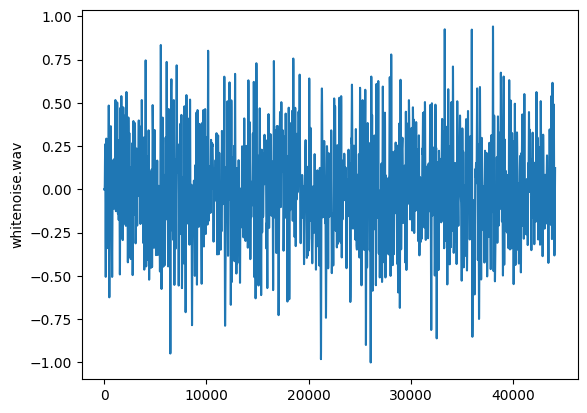

In [6]:
import soundfile as sf
import matplotlib.pyplot as plt

soundfile = 'whitenoise.wav'
desired_sample_rate = 16000.0
desired_resolution = 12
range = 2**desired_resolution - 1

data_in, datasamplerate = sf.read(soundfile)
# This means stereo so extract one channel 0
if len(data_in.shape)>1:
    data_in = data_in[:,0]
plt.plot(data_in)
plt.ylabel(soundfile)
plt.show()



In [7]:
import samplerate
converter = 'sinc_best'  # or 'sinc_fastest', ...
ratio = desired_sample_rate/datasamplerate
data_out = samplerate.resample(data_in, ratio, converter)
print(data_out)
maxValue = max(data_out)
minValue = min(data_out)
print("length", len(data_out))
print("max value", max(data_out))
print("min value", min(data_out))
vrange = (maxValue - minValue) 
print("value range", vrange)

[ 6.0074160e-07  2.1612937e-06 -3.6995884e-06 ...  9.6743271e-02
  1.0424104e-01  1.2816885e-01]
length 16000
max value 0.9396924
min value -0.9999758
value range 1.9396682


In [8]:
filename = soundfile[:-4]
m68code = "/*\n    File "+soundfile+ "\r\n*/\r\n\n"
m68code += "#define "+ filename + "_length "+str(len(data_out))+" \r\n\r\n"
m68code += "#define "+ filename + "_sample_rate " + str(int(desired_sample_rate)) + "\r\n\r\n"
m68code += "const uint16_t " + filename + "_data[] = {\r\n    "
maxitemsperline = 16
itemsonline = maxitemsperline
firstvalue = 0
lastvalue = 0
for v in data_out:
    # scale v to between 0 and 1
    isin = (v-minValue)/vrange   
    # scale to between 0 and range
    v = int(isin*range)
    vstr = str(v)
    if (firstvalue==0):
        firstvalue= v
    lastvalue = v
    m68code+=vstr
    itemsonline-=1
    if (itemsonline>0):
        m68code+=','
    else:
        itemsonline = maxitemsperline
        m68code+=',\r\n    '
        
# keep track of first and last values to avoid
# blip when the loop restarts.. make the end value
# the average of the first and last. 
end_value = int( (firstvalue + lastvalue) / 2)
m68code+=str(end_value)+'    \r\n};'
print(m68code)    

/*
    File whitenoise.wav
*/

#define whitenoise_length 16000 

#define whitenoise_sample_rate 16000

const uint8_t whitenoise_data[] = {
    2111,2111,2111,2111,2111,2111,2111,2111,2111,2110,2110,2110,2110,2109,2110,2110,
    2112,2116,2123,2133,2147,2166,2190,2220,2256,2298,2344,2393,2445,2496,2544,2587,
    2623,2648,2660,2658,2639,2603,2550,2479,2392,2291,2177,2054,1925,1794,1664,1538,
    1421,1316,1225,1150,1095,1059,1044,1050,1076,1122,1185,1264,1358,1462,1575,1694,
    1816,1938,2057,2172,2278,2376,2462,2536,2598,2648,2685,2710,2725,2730,2727,2718,
    2704,2687,2667,2647,2628,2609,2592,2576,2563,2551,2540,2530,2520,2509,2497,2483,
    2468,2449,2428,2403,2374,2341,2303,2260,2212,2159,2102,2039,1973,1905,1834,1764,
    1696,1630,1570,1516,1471,1435,1410,1397,1396,1407,1430,1464,1507,1559,1616,1676,
    1738,1800,1858,1912,1961,2002,2036,2064,2084,2099,2110,2118,2124,2131,2140,2152,
    2169,2193,2223,2262,2308,2363,2425,2495,2569,2648,2729,2809,2887,2959,3022,3073,
    3111,31